<a href="https://colab.research.google.com/github/Canakin21/DL/blob/master/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print('len(x_train)= %d\n len(x_test)= %d' %(len(x_train),len(x_test)))

len(x_train)= 60000
 len(x_test)= 10000


In [0]:
A=x_train[1]
print(A)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [0]:
print(A.shape)

(28, 28)


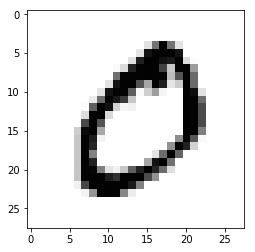

In [0]:
plt.imshow(A, cmap = 'Greys')

In [0]:
print(y_train[1])

0


In [0]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()


model.add(Dense(8, input_dim=784))
model.add(Activation('selu'))

model.add(Dense(16))
model.add(Activation('selu'))

model.add(Dense(32))
model.add(Activation('selu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

model.summary()

W0620 04:20:12.966503 139854340466560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 6280      
_________________________________________________________________
activation_28 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                144       
_________________________________________________________________
activation_29 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_30 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
__________

In [0]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0707 - acc: 0.4833
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0397 - acc: 0.7450
Epoch 3/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0300 - acc: 0.8005
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0242 - acc: 0.8482
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0209 - acc: 0.8679
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0189 - acc: 0.8795
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0177 - acc: 0.8872
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0168 - acc: 0.8922
Epoch 9/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0161 - acc: 0.8966
Epoch 10/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0156 - acc: 0.8993

神經網路判斷為: 2


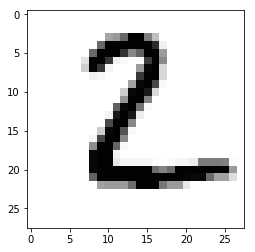

In [0]:
from ipywidgets import interact_manual

predict = model.predict_classes(x_test)

def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])
    
test(1)

In [0]:
score = model.evaluate(x_test, y_test)

print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 36us/step
loss: 0.012750278019625694
正確率 0.9176
